# Housing Price Prediction using Linear Regression

## Importing and Understanding the Data 

In [49]:
# Import necessary libraries and Supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [50]:
# housing = pd.DataFrame(pd.read_csv("./Housing.csv"))

df = pd.read_csv("./Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [51]:
# Check the first 10 rows of the dataset
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


## Data Inspection

In [52]:
df.shape

(545, 13)

In [53]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data Cleaning

In [55]:
# Checking for Null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Exploratory Data Analytics (EDA) for House Price Prediction
The most important step is- **understanding the data**.

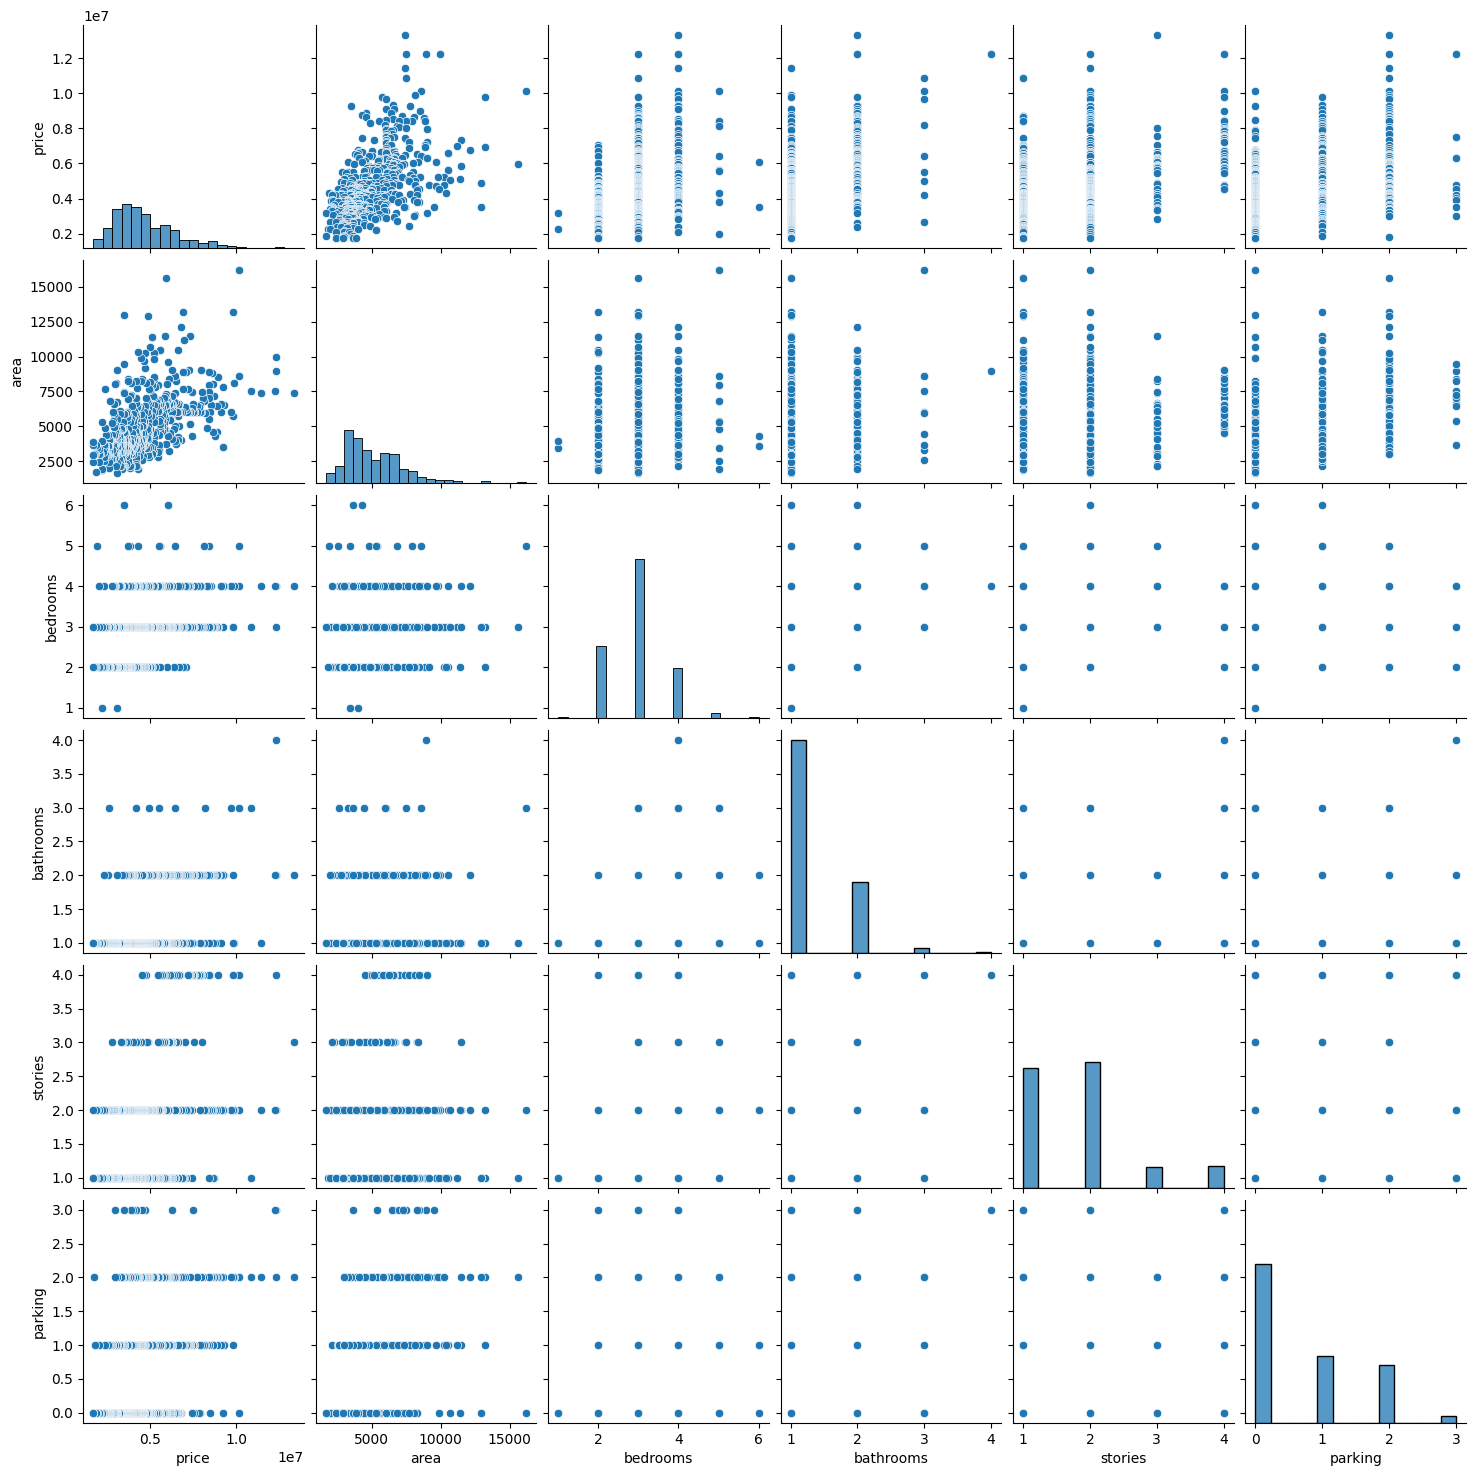

In [56]:
sns.pairplot(df)

### **Frequency distribution of the 'price' values, that gives an idea of how prices are distributed within the dataset. This is known as ***Univariate Analysis*** becasue only a single variable(column) is used here.**

<Axes: xlabel='price', ylabel='Count'>

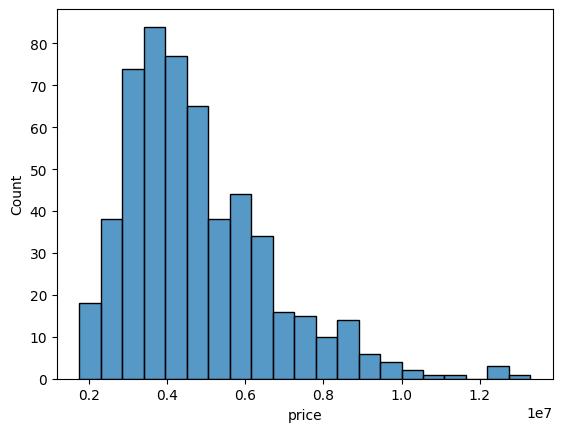

In [57]:
sns.histplot(df['price'])

### **Bivariate Analysis: Understanding the relationship between the price and area**

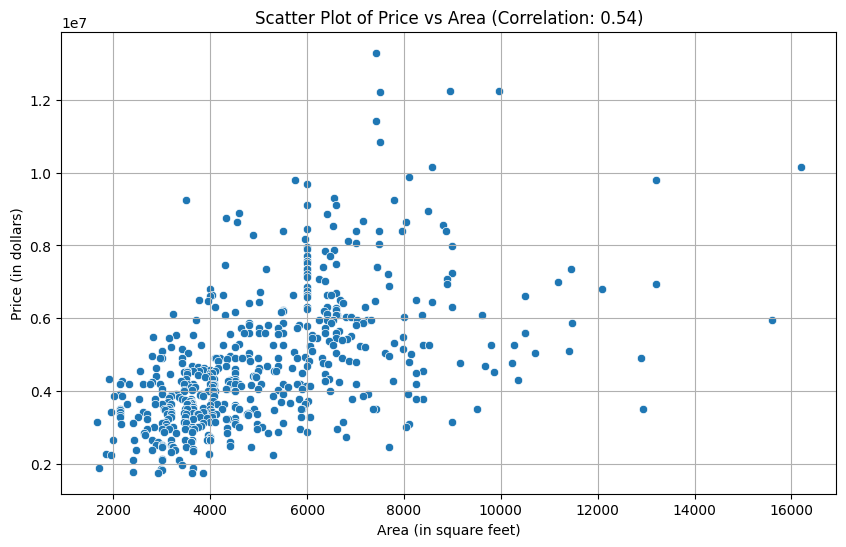

The value of correlation between price and area is 0.54


In [58]:
price_area_corr = df['price'].corr(df['area'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title(f'Scatter Plot of Price vs Area (Correlation: {price_area_corr:.2f})')
plt.xlabel('Area (in square feet)')
plt.ylabel('Price (in dollars)')
plt.grid(True)
plt.show()

print(f'The value of correlation between price and area is {price_area_corr:.2f}')

### **Analyzing outliers between price and area using Boxplot**

In [59]:
# Identifying outliers using the Interquartile Range (IQR) method

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Define outlier boundaries
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Identifying outliers
outliers_price = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]
outliers_area = df[(df['area'] < lower_bound_area) | (df['area'] > upper_bound_area)]

outliers_summary = {
    'Total Price Outliers': len(outliers_price),
    'Price Outliers Percentage': round((len(outliers_price) / len(df)) * 100, 2),
    'Total Area Outliers': len(outliers_area),
    'Area Outliers Percentage': round((len(outliers_area) / len(df)) * 100, 2)
}

outliers_summary

{'Total Price Outliers': 15,
 'Price Outliers Percentage': 2.75,
 'Total Area Outliers': 12,
 'Area Outliers Percentage': 2.2}

##### 2.75% (0.0275) and 2.2% (0.022) is a very less value for outliers, so there is no point of removing outliers and recalculating the correlation value, it would be approximated to the same value.

### **Analyzing 'price' (numeric) and 'furnishingstatus' (categorical) columns**

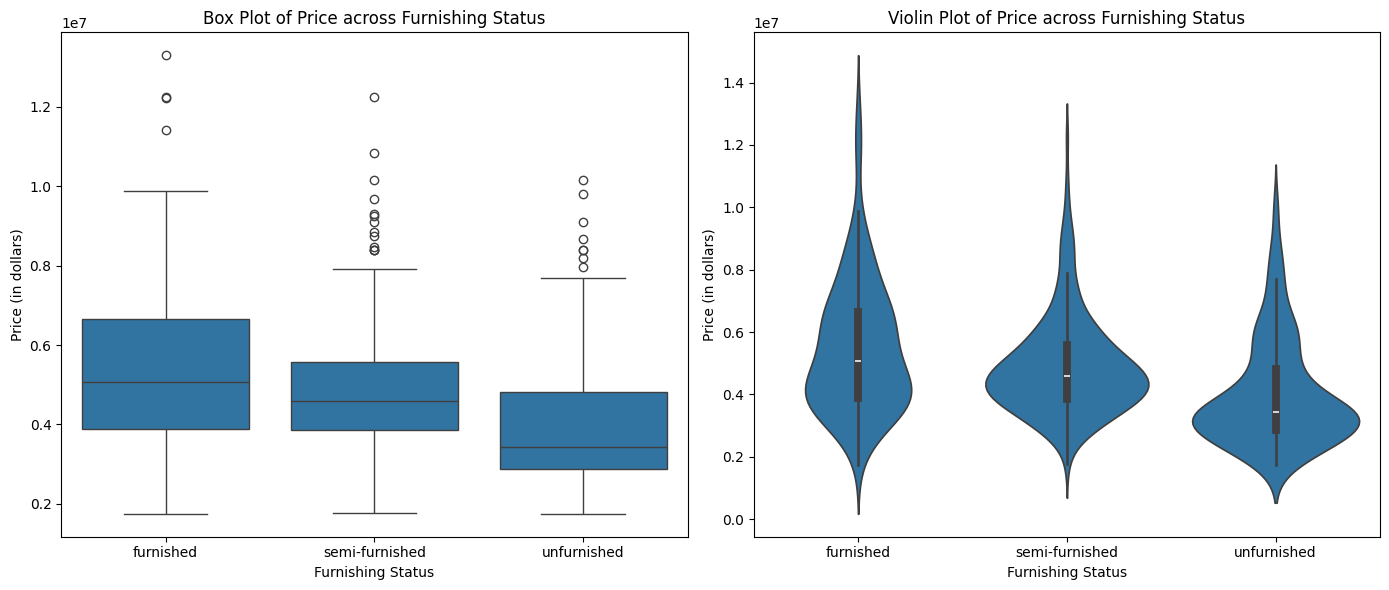

In [60]:
# Creating box plot and violin plot for 'price' across 'furnishingstatus'

plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['furnishingstatus'], y=df['price'])
plt.title('Box Plot of Price across Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price (in dollars)')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x=df['furnishingstatus'], y=df['price'])
plt.title('Violin Plot of Price across Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price (in dollars)')

plt.tight_layout()
plt.show()

### **Performing Multivariate Analysis**

#### Correlation matrix for all numeric variables in the dataset.

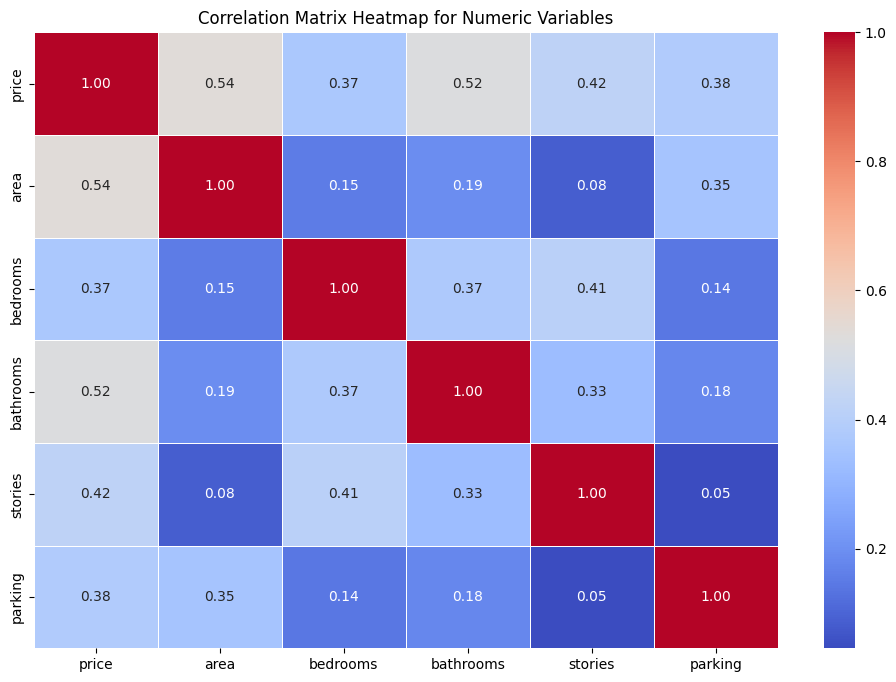

In [61]:
# Calculate the correlation matrix for numeric data only
numeric_corr_matrix_new = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr_matrix_new, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numeric Variables')
plt.show()

## Applying label hot encoding to some columns

In [62]:
def binary_map(feature):
    return feature.map({'yes': 1, 'no': 0, 'True': 1, 'False': 0})

# Load the dataset again to apply transformations
df = pd.read_csv('./Housing.csv')

# Identify relevant columns for binary mapping
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply the binary_map function to the relevant columns before one-hot encoding
for column in binary_columns:
    df[column] = binary_map(df[column])

# Apply one-hot encoding to the remaining categorical variables
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'])

# Display the first few rows of the final dataset after transformation
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


## Applying Linear Regression Model

In [73]:
# Step 1: Convert True/False in furnishingstatus columns to 1/0
df_encoded['furnishingstatus_furnished'] = df_encoded['furnishingstatus_furnished'].astype(int)
df_encoded['furnishingstatus_semi-furnished'] = df_encoded['furnishingstatus_semi-furnished'].astype(int)
df_encoded['furnishingstatus_unfurnished'] = df_encoded['furnishingstatus_unfurnished'].astype(int)

# Step 2: Shuffle the data and split into training and testing sets
np.random.seed(0)
df_encoded = df_encoded.sample(frac=1).reset_index(drop=True)
df_train, df_test = train_test_split(df_encoded, train_size=0.8, random_state=42)

# Separate features and target variable
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results for the evaluation of the model 
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Root Mean Squared Error: 1005.916
R^2 Score: 0.664


### Visualizing Actual vs. Predicted House Prices for Linear Regression Model

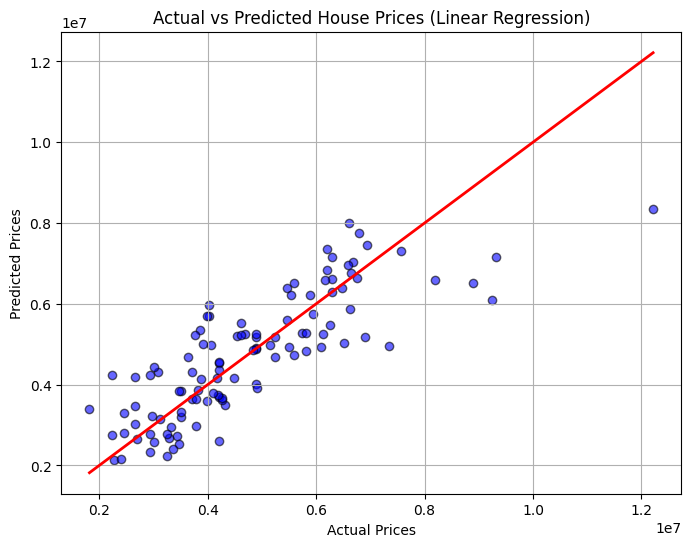

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Applying Regularization to improve the model’s performance.

### Ridge Regression

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge_model = Ridge(alpha=1.0)

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

# Output the results
print(f'Cross-validated RMSE scores on training data with Ridge: {rmse_scores}')
print('\t')
print(f'Mean RMSE with Ridge: {rmse_scores.mean()}')
print('\t')
print(f'Standard Deviation of RMSE with Ridge: {rmse_scores.std()}')

Cross-validated RMSE scores on training data with Ridge: [1098300.30775765 1048653.62738497 1354134.99474452 1186987.80074856
 1166259.98121242 1258985.24463041  815060.47043739 1021562.37713793
  883282.11900118 1198459.73508032]
	
Mean RMSE with Ridge: 1103168.6658135355
	
Standard Deviation of RMSE with Ridge: 157594.75125197327


## Random Forest or Gradient Boosting are likely to improve your model’s performance by capturing more complex relationships.

## Applying Random Forest Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Output the results
print(f'Cross-validated RMSE scores with Random Forest: {rf_rmse_scores}')
print(f'Mean RMSE with Random Forest: {rf_rmse_scores.mean()}')
print(f'Standard Deviation of RMSE with Random Forest: {rf_rmse_scores.std()}')

Cross-validated RMSE scores with Random Forest: [1174856.98573768 1173176.23656085 1550598.95371317 1340851.29576042
 1232428.96156342 1256189.36398669 1142734.73294467 1164571.1555703
  977760.52002421 1160778.71100611]
Mean RMSE with Random Forest: 1217394.6916867525
Standard Deviation of RMSE with Random Forest: 141688.65102637088


### Visualizing Feature Importance and Actual vs. Predicted House Prices

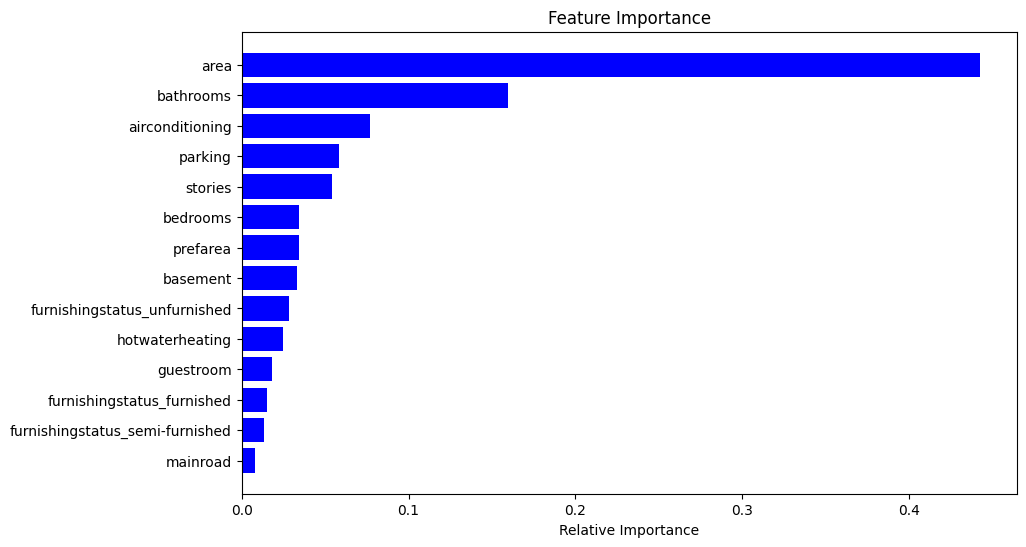

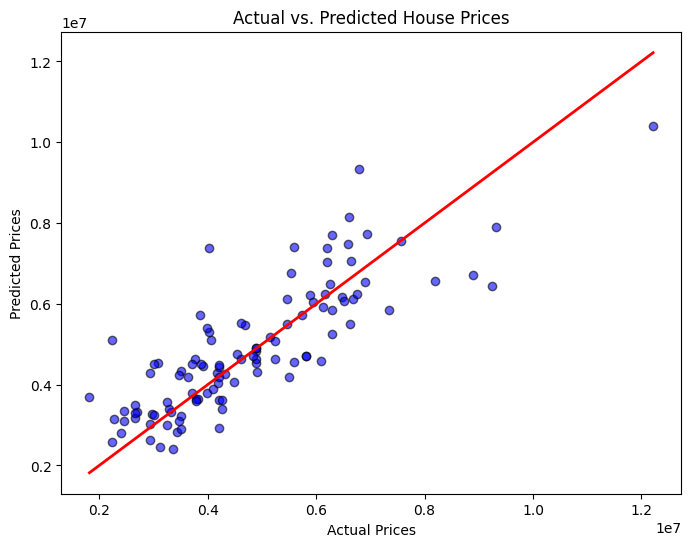

In [91]:
# Feature importance plot
imp = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Actual vs. Predicted Plot
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs. Predicted House Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Applying Gradient Boosting Model

In [89]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the XGBoost model
gbm_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gbm_model.fit(X_train, y_train)

# Perform 10-fold cross-validation
gbm_cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the scores to positive RMSE
gbm_rmse_scores = np.sqrt(-gbm_cv_scores)

# Output the results
print(f'Cross-validated RMSE scores with Gradient Boosting: {gbm_rmse_scores}')
print(f'Mean RMSE with Gradient Boosting: {gbm_rmse_scores.mean()}')
print(f'Standard Deviation of RMSE with Gradient Boosting: {gbm_rmse_scores.std()}')

Cross-validated RMSE scores with Gradient Boosting: [1257229.00884152 1309825.19832811 1568109.53457325 1304124.03133217
 1188584.99531952 1222384.13376467 1318534.10416637  955638.17269919
  878162.41515135 1108771.49014188]
Mean RMSE with Gradient Boosting: 1211136.3084318032
Standard Deviation of RMSE with Gradient Boosting: 186209.41534498593


## Visulizing Actual vs Predicted values for Gradient Boosting

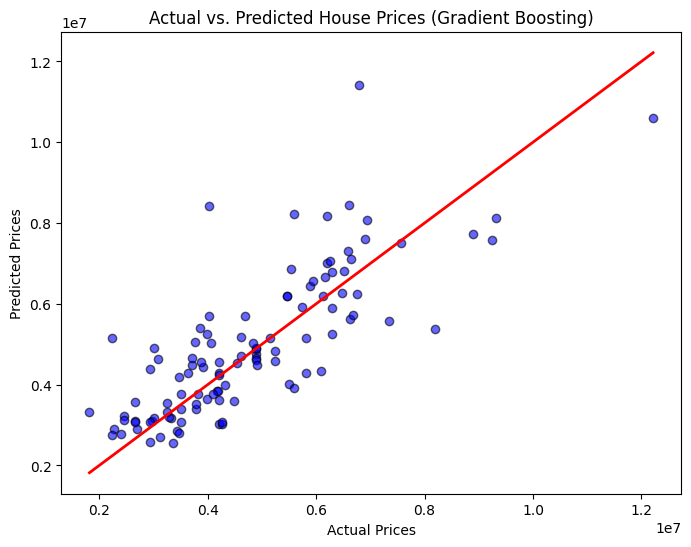

In [92]:
y_pred_gbm = gbm_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line
plt.title('Actual vs. Predicted House Prices (Gradient Boosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()